# Everyone Can Learn Python Scholarship

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

##  CO2 emissions of Canadian vehicles.
1
![my image caption](autos_canada.jpg) 





In [1]:
# Import the pandas ,numpy, seaborn and matplot packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# Look at the first ten items in the CO2 emissions array and inspecting the data
cars_co2_emissions[:10]
cars.info()
cars.describe()
print('They are ',cars.duplicated().sum(),'duplicates')

# Remove duplicates
cars.drop_duplicates(inplace= True)

# Confirm duplicates are removed
cars.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB
They are  1314 duplicates


0

##  INSIGHTS ON THE TYPE OF VEHÍCULE THAT HAVE LOWER CO2 EMISSIONS.
1. What is the median engine size in liters?
The median engine size in liters 3.0. 


The median engine size in liters 3.0


[Text(0.5, 0, 'Engine Size'), Text(0.5, 1.0, 'Median engine size')]

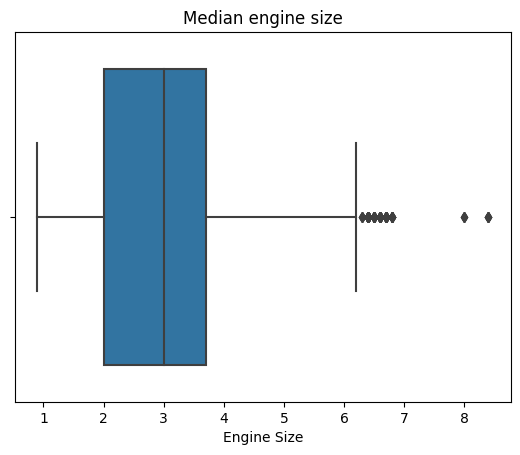

In [3]:

#What is the median engine size in liters?
print('The median engine size in liters', np.median(cars['Engine Size(L)']))
gfg =sns.boxplot(x=cars_engine_sizes)
gfg.set(xlabel ="Engine Size" ,title ='Median engine size')

2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)? 

The average fuel consumption (L/100 Km) for regular gasoline type (X) is: 10.11 ,premium gasoline (Z) 11.4 ,ethanol (E) 16.93 and diesel(D): 8.73. We can conclude Diesel type have the best performance in fuel consumption per Km.

Fuel Type
D     8.730070
E    16.931269
N    12.700000
X    10.111339
Z    11.403438
Name: Fuel Consumption Comb (L/100 km), dtype: float64
The average fuel consumption (L/100 Km) for regular gasoline type (X) is: 10.11 ,premium gasoline (Z) 11.4 ,ethanol (E) 16.93 and diesel(D): 8.73


<AxesSubplot: xlabel='Fuel Type', ylabel='Fuel Consumption Comb (L/100 km)'>

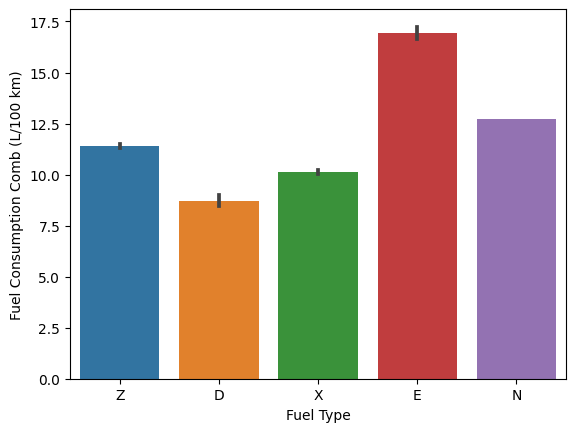

In [4]:
avg_consumption_per_fuel_type= (cars['Fuel Consumption Comb (L/100 km)'].groupby(cars['Fuel Type']).mean())
print(avg_consumption_per_fuel_type)
avg_consumption_per_fuel_type = round(avg_consumption_per_fuel_type,2)
print('The average fuel consumption (L/100 Km) for regular gasoline type (X) is:', avg_consumption_per_fuel_type.loc['X'], ',premium gasoline (Z)', avg_consumption_per_fuel_type.loc['Z'], ',ethanol (E)', avg_consumption_per_fuel_type.loc['E'], 'and diesel(D):', avg_consumption_per_fuel_type.loc['D'])
sns.barplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)',data=cars) 

3. What is the correlation between fuel consumption and CO2 emissions?
We can see a strong postive correlation between fuel consumption and CO2 emissions in cars. The correlation is 0.92. Thats mean that a car that has more fuel consumption will have more CO2 emission.



Correlation between  Fuel Consumption Comb (L/100 km)  and  CO2 Emissions(g/km) is:  0.92


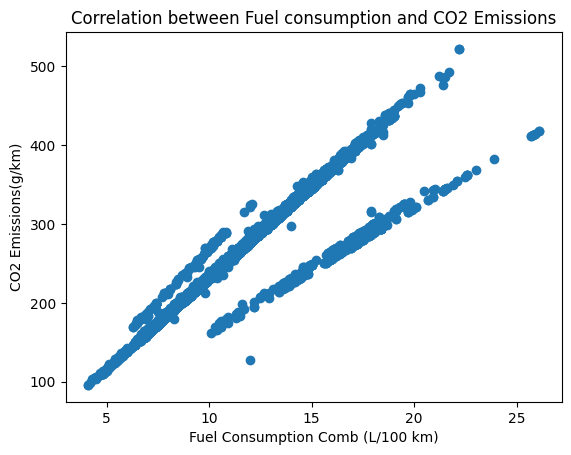

This show a strong positive correlation between fuel consumption and CO2 emissions in cars


In [5]:
corr = cars['Fuel Consumption Comb (L/100 km)'].corr(cars['CO2 Emissions(g/km)'])
print ("Correlation between ", 'Fuel Consumption Comb (L/100 km)', " and ", 'CO2 Emissions(g/km)', "is: ", round(corr, 2))
plt.scatter(cars['Fuel Consumption Comb (L/100 km)'], cars['CO2 Emissions(g/km)'])
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions(g/km)")
plt.title("Correlation between Fuel consumption and CO2 Emissions")

plt.show()
print('This show a strong positive correlation between fuel consumption and CO2 emissions in cars')

In [6]:
#What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
print('The average CO2 emissions for all vehicules is',round(cars['CO2 Emissions(g/km)'].mean(),2))
cars_small_engine = cars[cars['Engine Size(L)'] <= 2]
cars_big_engine = cars[cars['Engine Size(L)'] > 2 ]
avg_cars_small_engine = round(cars_small_engine['CO2 Emissions(g/km)'].mean(),2)
print('The average CO2 emissions for vehicules with an engine size of 2.0 liters or smaller is',avg_cars_small_engine)


The average CO2 emissions for all vehicules is 250.95
The average CO2 emissions for vehicules with an engine size of 2.0 liters or smaller is 198.58


5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
 
The average CO2 emissions for all vehicules is 250.95 and the average CO2 emissions for vehicules with an engine size of 2.0 liters or smaller is 198.58. We can acknoledge that small engine cars have less CO2 emissions.


The median of the CO2 emissions is 246.0
The average CO2 emissions is 250.58


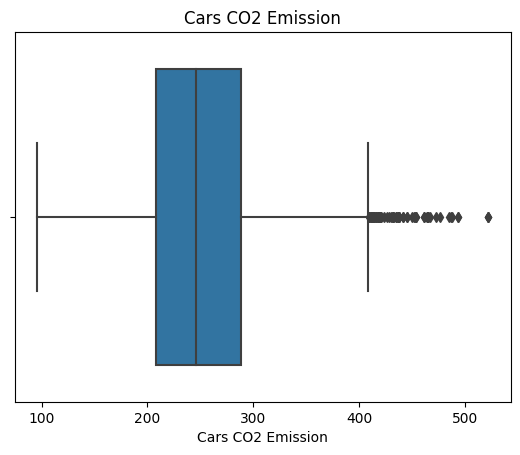

In [7]:
 #Any other insights you found during your analysis?
gfg1 =sns.boxplot(x=cars_co2_emissions)
gfg1.set(xlabel ="Cars CO2 Emission" ,title ="Cars CO2 Emission") 
print('The median of the CO2 emissions is',np.median(cars_co2_emissions))
print('The average CO2 emissions is',round(np.mean(cars_co2_emissions),2))

    


6. Any other insights you found during your analysis?
In the analysis we have to take into account the number of passengers carried by each type of vehicle, because a large car can emit more CO2 but can carry more people in one trip. I would recommend promoting diesel cars with small engines. Benefits could be granted to both users and sellers of cars that emit below average and median emissions.

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## Bicicly Market
![my image caption](bici.jpg) 


In [8]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [9]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [10]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

In [11]:


SELECT SUM(CASE WHEN brand_id IS NULL THEN 1 ELSE 0 END
        + CASE WHEN brand_name IS NULL THEN 1 ELSE 0 END) AS COUNT_OF_NULLS_OF_BRANDS
FROM brands




,COUNT_OF_NULLS_OF_BRANDS
0,0


In [12]:
SELECT SUM(CASE WHEN category_id IS NULL THEN 1 ELSE 0 END
        + CASE WHEN category_name IS NULL THEN 1 ELSE 0 END) AS COUNT_OF_NULL_IN_CATEGORIES
FROM categories

,COUNT_OF_NULL_IN_CATEGORIES
0,0


In [13]:
SELECT SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END
        + CASE WHEN product_name IS NULL THEN 1 ELSE 0 END
		  + CASE WHEN brand_id IS NULL THEN 1 ELSE 0 END
		  + CASE WHEN category_id IS NULL THEN 1 ELSE 0 END
		  + CASE WHEN model_year IS NULL THEN 1 ELSE 0 END
		  + CASE WHEN list_price IS NULL THEN 1 ELSE 0 END) AS COUNT_OF_NULL_IN_PRODUCTS
FROM products

,COUNT_OF_NULL_IN_PRODUCTS
0,0


In [14]:
SELECT SUM(CASE WHEN store_id IS NULL THEN 1 ELSE 0 END
        + CASE WHEN product_id IS NULL THEN 1 ELSE 0 END
		  + CASE WHEN quantity IS NULL THEN 1 ELSE 0 END) AS COUNT_OF_NULL_IN_STOCKS
FROM stocks

,COUNT_OF_NULL_IN_STOCKS
0,0


In [16]:
SELECT TOP 1 
product_id,product_name,list_price
FROM products
ORDER BY list_price DESC


,product_id,product_name,list_price
0,155,Trek Domane SLR 9 Disc - 2018,11999.99


In [17]:
SELECT TOP 1 
product_id,product_name,list_price
FROM products
ORDER BY list_price ASC

,product_id,product_name,list_price
0,263,Strider Classic 12 Balance Bike - 2018,89.99


1.The most expensive item the company sells is the Trek Domane SLR 9 Disc - 2018 Bicicly and costs 11999.99. The cheapest item is the Strider Classic 12 Balance Bike - 2018 at 89.99. 

In [7]:
SELECT category_name, COUNT(product_id) AS Number_of_products_sold
from products AS p
JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY category_name
ORDER BY Number_of_products_sold DESC;

,category_name,Number_of_products_sold
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


2.How many different products of each category does your company sell?

78 cruiser bikes, 60 mountain bikes, 60 road bikes, 59 children's bikes, 30 comfort bikes, 24 electric bikes and 10 cyclocross bikes.

In [9]:
SELECT TOP (3)  b.brand_name, AVG(p.list_price) as avg_list_price 
FROM products AS p
LEFT JOIN brands AS b
ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY AVG(p.list_price) DESC;



,brand_name,avg_list_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


3. What are the top three brands with the highest average list price? The top three categories?
The top 3 three brands with the highest average list price are in first place Trek (2500.06), Heller (2172.99) and Surly (1331.75)

In [18]:
SELECT TOP 10 product_name,sum(s.quantity) as total_stock, avg(p.list_price) as avg_price
FROM products as p 
LEFT JOIN stocks as s 
ON p.product_id = s.product_id
GROUP BY product_name
ORDER BY sum(s.quantity) DESC



,product_name,total_stock,avg_price
0,Electra Townie Original 7D - 2017,125,489.99
1,Electra Townie Balloon 8D EQ Ladies' - 2016/20...,121,749.99
2,Electra Townie Go! 8i - 2017/2018,120,2599.99
3,Electra Townie Commute 8D - 2018,119,749.99
4,Sun Bicycles Cruz 7 - 2017,115,416.99
5,Electra Townie Original 21D - 2018,109,559.99
6,Sun Bicycles Cruz 3 - 2017,109,449.99
7,Surly Straggler - 2018,109,1549.00
8,"Electra Girl's Hawaii 1 16"" - 2017",107,299.99
9,Electra Townie Go! 8i Ladies' - 2018,100,2599.99


4. Any other insights you found during your analysis?
Looking at the top 10 products that have the most stock across all stores, I noticed that Electra Townie appears 6 times. It might be useful to analyse the sales of this product and check whether the stock level of this type of product is appropriate.

I am willing to receive any suggestions for improvement, I am doing my first DataCamp competences in order to develop a portfolio in Github.
I also invite you to connect via Linkedin (https://linkedin.com/in/fernando-arias-salta)
or Instagram ( https://www.instagram.com/bechi_ok)